# EDSA -Climate Change Belief Analysis 2021

## By Team: Regression_MM2_DSF

### Dimakatso Mongwegelwa
### Reitumetse Nchoe
### Refiloe Dhlamini
### Chantell Machobane
### Emanuel Dikotla
### Neo Sebanze


## Challenge Description 

### Team_MM2 is required to ...

## Dataset Description  

## Notebook Outline 

1. Package Installation
2. Importing Libraries
3. Loading the data
    * Viewing Data
4. Data Cleaning 
5. Exploratory Data Analysis



# Package Installation

# Importing Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

##Data Cleaning
import nltk #
import string #to remove all punctuation marks in the corpus/ document
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

from sklearn.model_selection import train_test_split

# set plot style
sns.set()

In [2]:
pd.set_option("display.max_colwidth", -1)

<ipython-input-2-a09e5efec013>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


# Loading Data 

In [3]:
df_train = pd.read_csv("train.csv")

df_test = pd.read_csv('test.csv')

#df_sample = pd.read_csv('../input/edsa-climate-change-belief-analysis-2021/sample_submission.csv')

### Viewing the Data

In [4]:
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [5]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


In [6]:
# checking the dataset Dimensions
print("The shape of the training set is:")
print(df_train.shape) 
print("The shape of the testing set is:")
print(df_test.shape)
# adding the rows of both training and testing set for the total entries
print("the total entries of the dataset")
print(len(df_train) + len(df_test))

The shape of the training set is:
(15819, 3)
The shape of the testing set is:
(10546, 2)
the total entries of the dataset
26365


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Data has 3 columns, numeric and string data types, 15819 tweets and no missing values. Below is the type of sentiments the data contains

In [8]:
type_sentiment = list(df_train.sentiment.unique())
print(type_sentiment)

[1, 2, 0, -1]


We have 4 types of sentiments in our dataset. Now lets see how many data samples we have for each sentiment

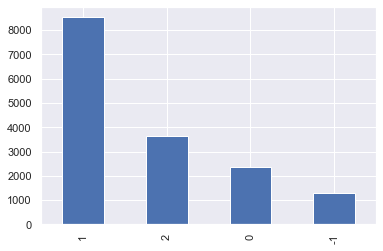

In [9]:
df_train['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

## Data Cleaning 

Removing Noise In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format. Our data contains uppercase letters, special characters as urls, these needs to be removed in the data cleaning process

In [10]:
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [11]:
### Remove urls and replace them with the word 'url-web'
#Our data doesn't seem to have any urls, adding code just in case
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

##Convert all lowercase to uppercase
df_train['message'] = df_train['message'].str.lower()

### Remove special characters, symbols
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

df_train['message'] = df_train['message'].apply(remove_punctuation)

df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb,573736
4,1,rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954


### Tokenisation
A tokeniser divides text into a sequence of tokens. We will use tokenisers to clean up the data, making it ready for analysis.
 

In [12]:
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['message'].apply(tokeniser.tokenize)

df_train['tokens'].head()

0    [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, urlweb, via, mashable]
1    [its, not, like, we, lack, evidence, of, anthropogenic, global, warming]                                                                
2    [rt, rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it’s, too, late, urlweb, urlweb…]        
3    [todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change, urlweb]                                           
4    [rt, soynoviodetodas, its, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]   
Name: tokens, dtype: object

### Lemmatisation
Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [13]:
#nltk.download('wordnet')
def train_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]  

lemmatizer = WordNetLemmatizer()

df_train['lemma'] = df_train['tokens'].apply(train_lemma, args=(lemmatizer, ))

In [14]:
#print out lemmmatisation results
for i, t in enumerate(df_train.iloc[15]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[15]['lemma'][i]))

rt                   --> rt        
glblctzn             --> glblctzn  
i                    --> i         
dont                 --> dont      
wan                  --> wan       
na                   --> na        
live                 --> live      
forever              --> forever   
–                    --> –         
and                  --> and       
nothing              --> nothing   
will                 --> will      
because              --> because   
climate              --> climate   
change               --> change    
����️��              --> ����️��   
taylorswift13        --> taylorswift13
zaynmalik            --> zaynmalik 
urlweb               --> urlweb    


### Stop words

Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.

In [15]:
stopwords_list = stopwords.words('english')
print(stopwords_list) #view list of all the stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# function removes stop words from the text

def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

#apply function to dataset
df_train['lemma'] = df_train['tokens'].apply(remove_stop_words)

In [17]:
df_train['lemma'].head()

0    [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, main, cause, global, warming, wait, urlweb, via, mashable]
1    [like, lack, evidence, anthropogenic, global, warming]                                                               
2    [rt, rawstory, researchers, say, three, years, act, climate, change, it’s, late, urlweb, urlweb…]                    
3    [todayinmaker, wired, 2016, pivotal, year, war, climate, change, urlweb]                                             
4    [rt, soynoviodetodas, 2016, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]          
Name: lemma, dtype: object

## Exploratory Data Analysis

### Feature Extraction

# 1. Building the `Classifier`

In [21]:
df_test

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts https://t.co/RpUs…",895714
10542,"2016: the year climate change came home: During the hottest year on record, Karl Mathiesen travelled to Tasmania… https://t.co/WwSrJQfvMg",875167
10543,RT @loop_vanuatu: Pacific countries positive about Fiji leading the global climate change conference in November. https://t.co/PIPRndhkYd,78329
10544,"RT @xanria_00018: You’re so hot, you must be the cause for global warming. #ALDUBLaborOfLove @jophie30 @asn585",867455


In [22]:
df_train

,sentiment,message,tweetid,tokens,lemma
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable,625221,"[polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, urlweb, via, mashable]","[polyscimajor, epa, chief, doesnt, think, carbon, dioxide, main, cause, global, warming, wait, urlweb, via, mashable]"
1,1,its not like we lack evidence of anthropogenic global warming,126103,"[its, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[like, lack, evidence, anthropogenic, global, warming]"
2,2,rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…,698562,"[rt, rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it’s, too, late, urlweb, urlweb…]","[rt, rawstory, researchers, say, three, years, act, climate, change, it’s, late, urlweb, urlweb…]"
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb,573736,"[todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change, urlweb]","[todayinmaker, wired, 2016, pivotal, year, war, climate, change, urlweb]"
4,1,rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954,"[rt, soynoviodetodas, its, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]","[rt, soynoviodetodas, 2016, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]"
...,...,...,...,...,...
15814,1,rt ezlusztig they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https…,22001,"[rt, ezlusztig, they, took, down, the, material, on, global, warming, lgbt, rights, and, health, care, but, now, theyre, hocking, melanias, qvc, https…]","[rt, ezlusztig, took, material, global, warming, lgbt, rights, health, care, theyre, hocking, melanias, qvc, https…]"
15815,2,rt washingtonpost how climate change could be breaking up a 200millionyearold relationship urlweb,17856,"[rt, washingtonpost, how, climate, change, could, be, breaking, up, a, 200millionyearold, relationship, urlweb]","[rt, washingtonpost, climate, change, could, breaking, 200millionyearold, relationship, urlweb]"
15816,0,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in … urlweb,384248,"[notiven, rt, nytimesworld, what, does, trump, actually, believe, about, climate, change, rick, perry, joins, other, aides, in, …, urlweb]","[notiven, rt, nytimesworld, trump, actually, believe, climate, change, rick, perry, joins, aides, …, urlweb]"
15817,-1,rt sara8smiles hey liberals the climate change crap is a hoax that ties to agenda2030\nthe climate is being changed byã¢â‚¬â¦,819732,"[rt, sara8smiles, hey, liberals, the, climate, change, crap, is, a, hoax, that, ties, to, agenda2030, the, climate, is, being, changed, byã¢â‚¬â¦]","[rt, sara8smiles, hey, liberals, climate, change, crap, hoax, ties, agenda2030, climate, changed, byã¢â‚¬â¦]"


In [20]:
# Vetorizing the features

In [207]:
df_x = df_train['lemma']
df_y = df_train['sentiment']

In [113]:
cv = CountVectorizer()

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y , test_size = 0.2, random_state = 4)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer